In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from HDF5DatasetGenerator import HDF5DatasetGenerator
import mlflow 
import torch
import torch.nn as nn

In [6]:
generator = HDF5DatasetGenerator('../data/structured/DISP_1_ANGLE_2/c4TrainGenerator.hdf5',int(5e6))
data1 = cp.array(next(generator.generator()))

In [79]:
generator = HDF5DatasetGenerator('../data/structured/DISP_1_ANGLE_3/HDF5/d3TrainGenerator.hdf5',int(5e6))
data2 = cp.array(next(generator.generator()))

In [7]:
import pandas as pd
d = pd.DataFrame(data1.get())

In [8]:
d.describe()

0             1             2             3             4  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   6.413134e-03 -1.305994e-03 -1.094074e-03 -1.495416e-03 -3.604168e-04   
std    7.200636e-01  1.003133e+00  1.008471e+00  1.005427e+00  1.137812e+00   
min   -7.828707e-01 -3.304610e+00 -3.380215e+00 -6.618908e+00 -7.581525e+00   
25%   -5.233812e-01 -8.627613e-01 -8.600985e-01 -7.111195e-01 -7.870588e-01   
50%   -2.442782e-01 -1.024318e-03 -1.548048e-03 -9.575535e-04  8.457390e-04   
75%    3.067050e-01  8.588421e-01  8.604072e-01  7.066949e-01  7.914344e-01   
max    3.315527e+00  3.305246e+00  3.464712e+00  6.615530e+00  7.642153e+00   

                  5  
count  5.000000e+06  
mean   5.118597e-03  
std    7.430934e-02  
min   -1.989413e+00  
25%    1.024616e-02  
50%    1.673474e-02  
75%    2.341630e-02  
max    3.109307e-02

In [9]:
d.corr()

0         1         2         3         4         5
0  1.000000 -0.001238  0.002851 -0.000716  0.005020  0.107175
1 -0.001238  1.000000  0.000308  0.791195  0.000807 -0.000070
2  0.002851  0.000308  1.000000 -0.000064  0.778309 -0.013477
3 -0.000716  0.791195 -0.000064  1.000000 -0.000735  0.000807
4  0.005020  0.000807  0.778309 -0.000735  1.000000  0.041770
5  0.107175 -0.000070 -0.013477  0.000807  0.041770  1.000000

In [53]:
keys = ['E', 'X', 'Y', 'dX', 'dY', 'dZ']

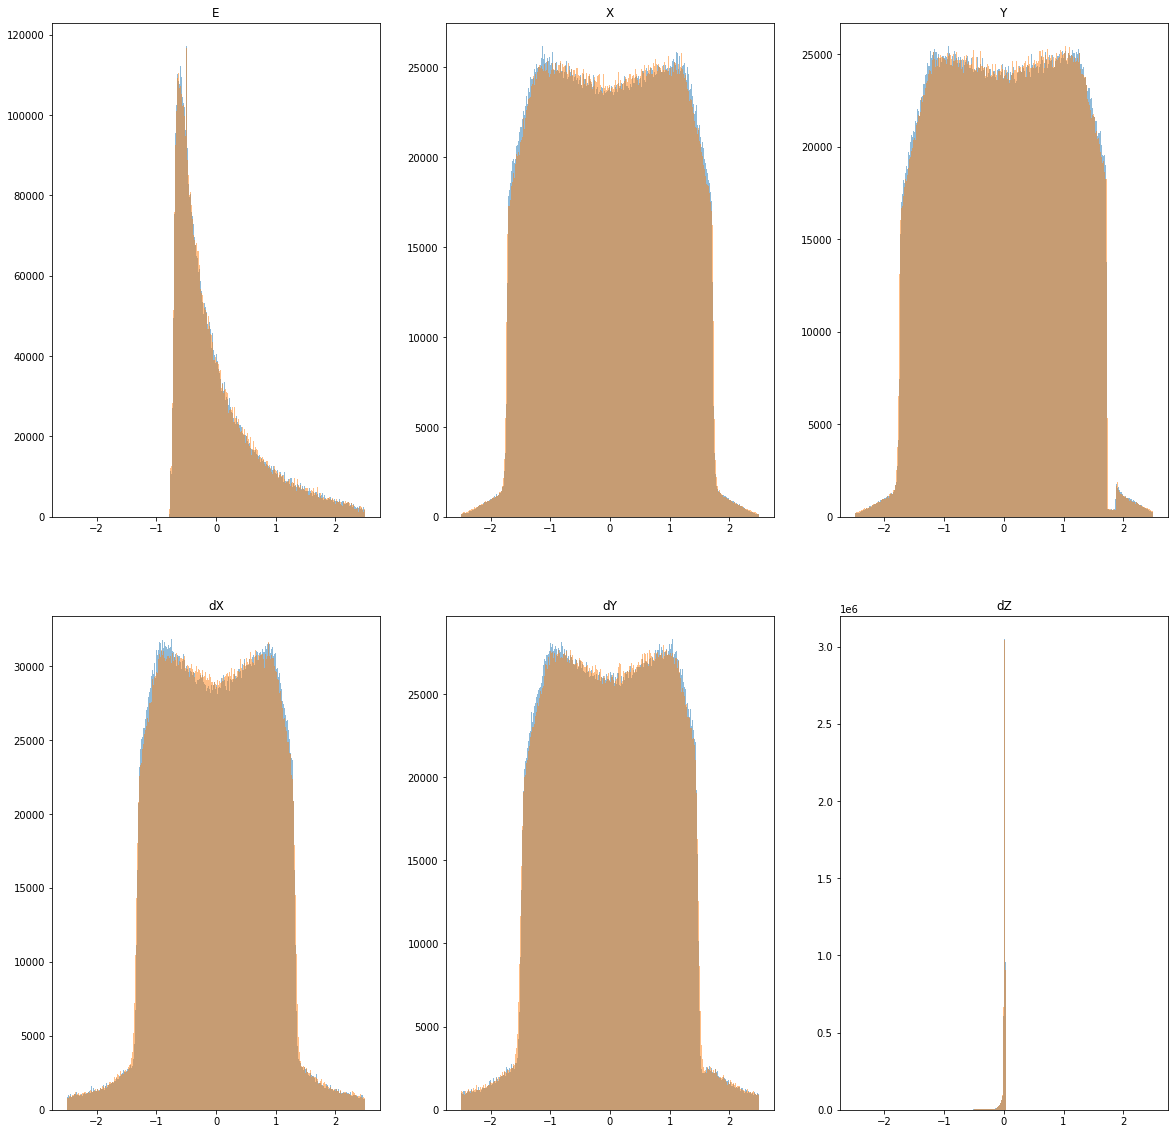

In [54]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    mi = -2.5
    ma = 2.5
    bins = np.linspace(mi, ma, 300)
    axs.flatten()[i].hist(data1[:, i].get(), bins, alpha=.5)
    axs.flatten()[i].set_title(j)
    axs.flatten()[i].hist(data2[:, i].get(), bins, alpha=.5)
    axs.flatten()[i].set_title(j)

In [55]:
for i, j in enumerate(keys):
    print(i,j)

0 E
1 X
2 Y
3 dX
4 dY
5 dZ


In [56]:
def cart_to_polar(x,y):
    r = cp.sqrt(cp.square(x) + cp.square(y))
    theta = cp.arctan(y/x)
    return r,theta

In [57]:
keys = ['E', 'R', 'THETA', 'dR', 'dTHETA', 'dZ']

In [58]:
for i,j in ((1,2),(3,4)):
    r,theta = cart_to_polar(data1[:,i],data1[:,j])
    data1[:,i] = r
    data1[:,j] = theta
    
for i,j in ((1,2),(3,4)):
    r,theta = cart_to_polar(data2[:,i],data2[:,j])
    data2[:,i] = r
    data2[:,j] = theta

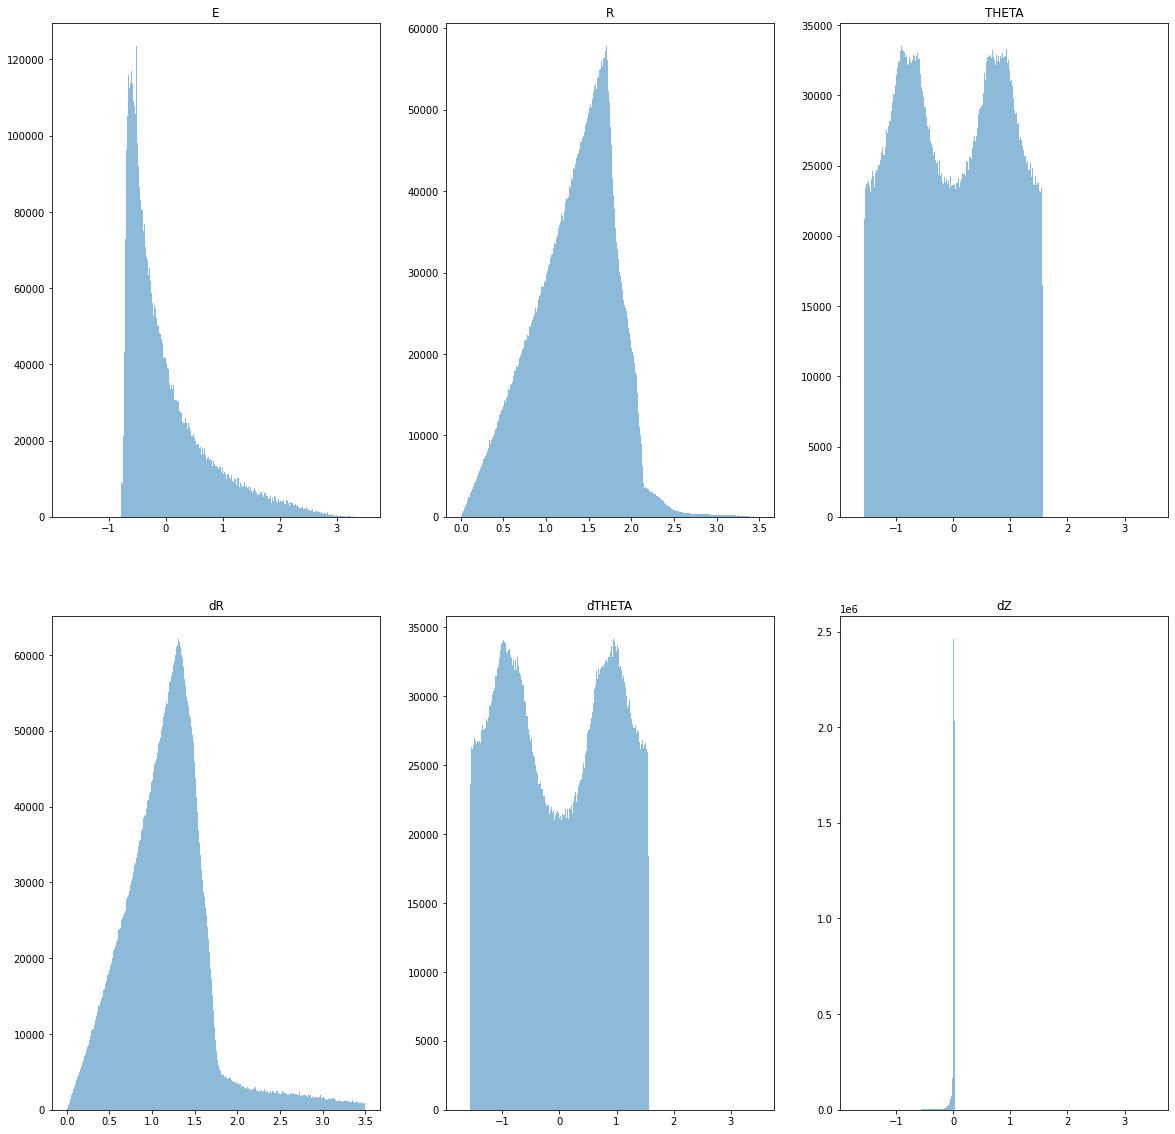

In [75]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    mi = 0 if 'R' in j else -1.73 
    ma = 3.5
    bins = np.linspace(mi, ma, 300)
    axs.flatten()[i].hist(data1[:, i].get(), bins, alpha=.5)
    axs.flatten()[i].set_title(j)

Text(0.5, 1.0, 'dZ')

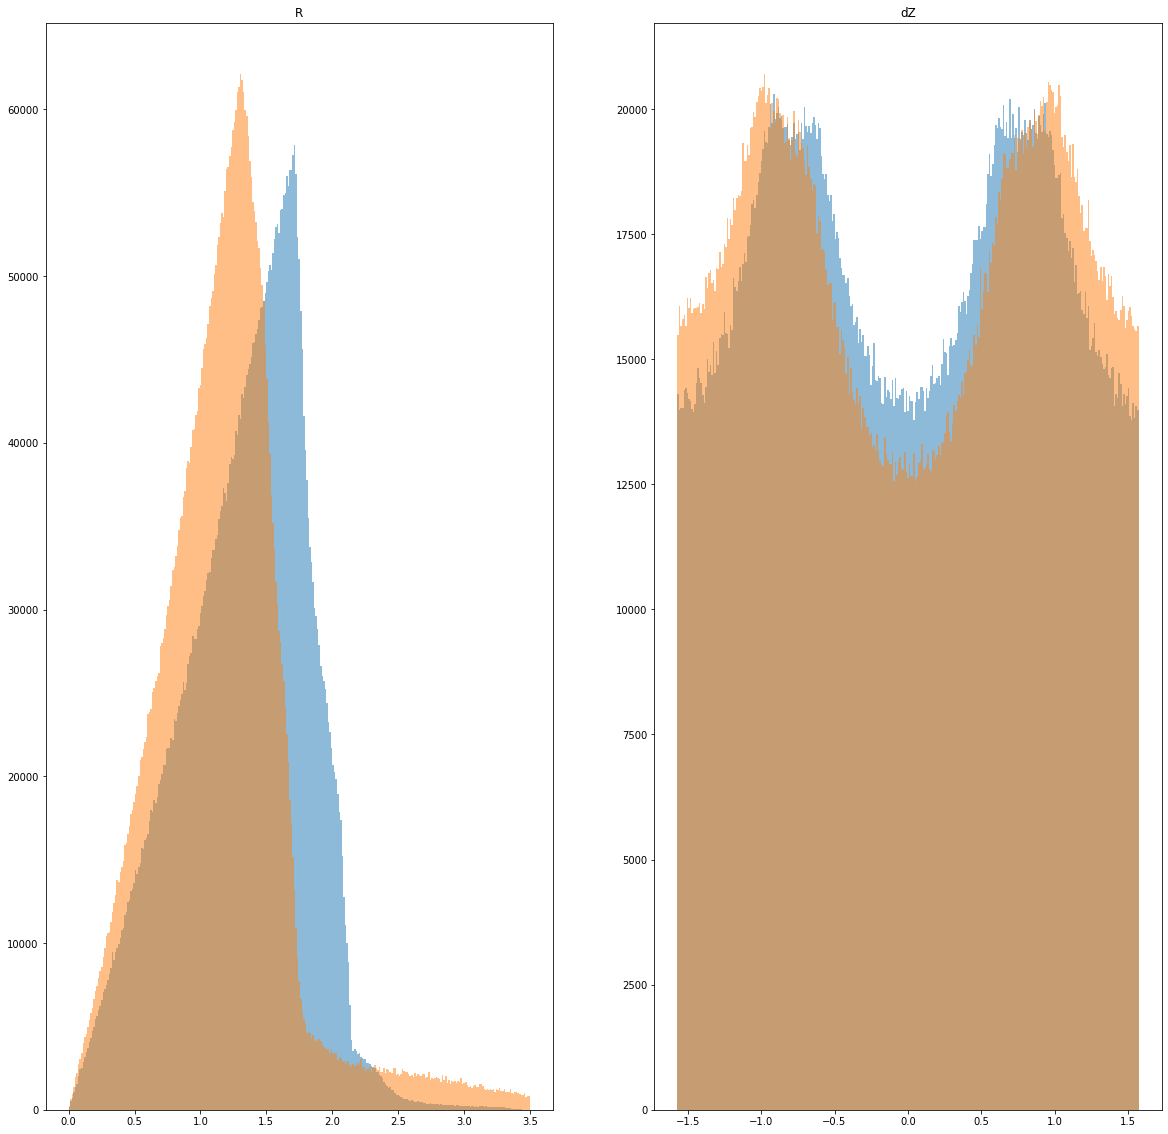

In [60]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 20)
mi = 0 
ma = 3.5
bins = np.linspace(mi, ma, 300)
axs.flatten()[0].hist(data1[:, 1].get(), bins, alpha=.5)
axs.flatten()[0].hist(data1[:, 3].get(), bins, alpha=.5)
axs.flatten()[0].set_title('R')
mi = -3.14/2
ma = 3.14/2
bins = np.linspace(mi, ma, 300)
axs.flatten()[1].hist(data1[:, 2].get(), bins, alpha=.5)
axs.flatten()[1].hist(data1[:, 4].get(), bins, alpha=.5)
axs.flatten()[1].set_title(j)

In [61]:
import itertools
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

In [62]:
comb = [x for x in powerset([0,1,2,3,4,5]) if len(x)==2]
len(comb)

15

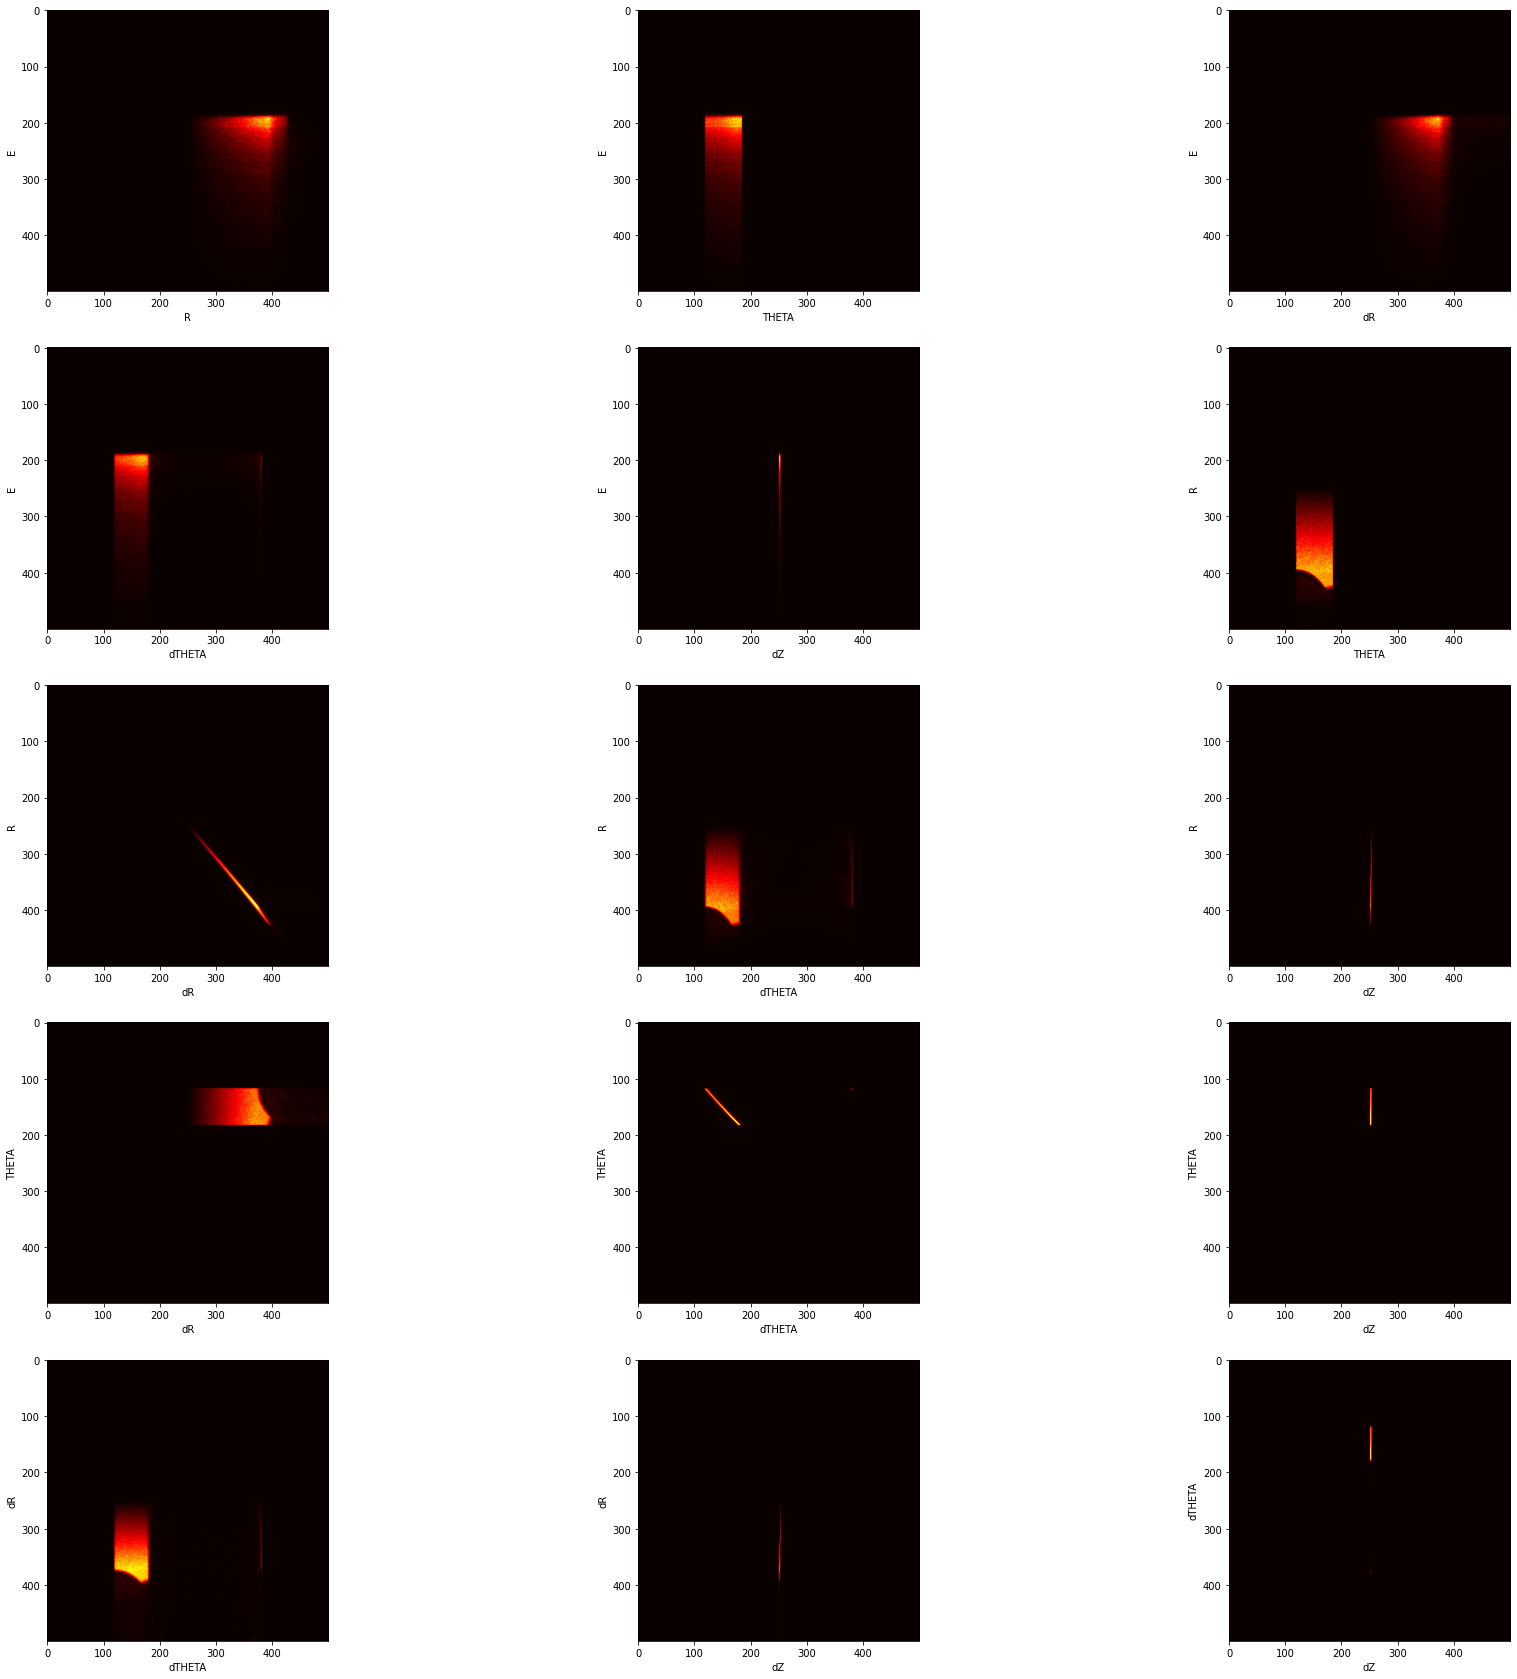

In [71]:
fig,axs = plt.subplots(5,3)
fig.set_size_inches((30,30))
for k,(i,j) in enumerate(comb):
    temp = cp.histogramdd(data1[data1[:,2]<-np.pi/4][:,[i,j]],bins=[500,500],range=[[-3,3],[-3,3]],density=True)
    temp_im = temp[0]
    axs.flatten()[k].imshow(temp_im.get(),cmap='hot')
    axs.flatten()[k].set_ylabel(keys[i])
    axs.flatten()[k].set_xlabel(keys[j])